In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score, precision_score, f1_score
clean_tesla = pd.read_csv('../datasets/clean_tesla.csv')
clean_tweets = pd.read_csv('../datasets/clean_tweets.csv')
tw_tesla = pd.merge(clean_tweets, clean_tesla, how='inner', on='date')
tw_tesla = tw_tesla.sort_values(by='date', ascending=True)
tw_tesla

,date,hour,month,day,texto_limpio,text,user_followers,user_friends,retweets,favorites,Sentiment Category,compound,Volume,Close
0,2022-07-05,17,7,5,find gold toe sock inevitably kilter amp washe...,@BillyM2k I find the gold toe sock – inevitabl...,101240855,115,335,6542,Negative,-0.6378,84581100,233.066666
1,2022-07-05,17,7,5,sock con conference socks,"Sock Con, the conference for socks",101240806,115,1451,30753,Neutral,0.0000,84581100,233.066666
2,2022-07-05,17,7,5,always something new magazine cover articles p...,Always something new for the magazine cover an...,101240806,115,1284,28610,Neutral,0.0000,84581100,233.066666
3,2022-07-05,17,7,5,guy gets,@ExplainThisBob This guy gets it,101240806,115,131,3640,Neutral,0.0000,84581100,233.066666
4,2022-07-05,17,7,5,sock tech advanced get pretty much anything so...,Sock tech is so advanced that you can get pret...,101240806,115,1191,23790,Positive,0.6369,84581100,233.066666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,2023-06-12,19,6,12,great predictor future,@realDailyWire Great predictor of the future,143325936,330,1034,21029,Positive,0.6249,150337900,249.830002
3914,2023-06-12,16,6,12,dig grave,@TitterDaily @NPR They dig their own grave,143325958,330,802,12539,Somewhat Negative,-0.3818,150337900,249.830002
3901,2023-06-13,1,6,13,doesnt make sense,@WallStreetSilv This doesn’t make sense,143325936,330,2358,21391,Neutral,0.0000,162384300,258.709992
3900,2023-06-13,1,6,13,investigate,@Damadeferroofic Will investigate,143325936,330,217,4056,Neutral,0.0000,162384300,258.709992


In [8]:
#daily_prices = tw_tesla.groupby('date')['Close']
#daily_pct_change = daily_prices.pct_change()
#daily_pct_change
#tw_tesla = tw_tesla.merge(daily_pct_change, how='left', on='date')


In [1]:
tw_tesla['date'] = pd.to_datetime(tw_tesla['date'])
tw_tesla.info()

NameError: name 'pd' is not defined

In [25]:
grouped_tw_tesla = tw_tesla.groupby('date')[['compound', 'Volume', 'Close']].mean().reset_index()

In [26]:
grouped_tw_tesla['price_change'] = grouped_tw_tesla['Close'].pct_change() * 100

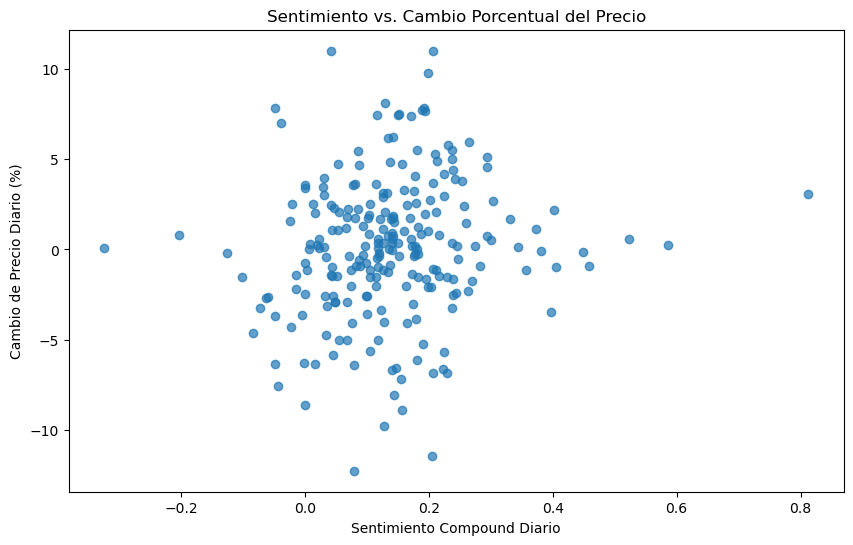

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(grouped_tw_tesla['compound'], grouped_tw_tesla['price_change'], alpha=0.7)
plt.xlabel('Sentimiento Compound Diario')
plt.ylabel('Cambio de Precio Diario (%)')
plt.title('Sentimiento vs. Cambio Porcentual del Precio')
plt.show()

In [11]:
pearson_corr, p_val = stats.pearsonr(grouped_tw_tesla['compound'], grouped_tw_tesla['price_change'])
print("Coeficiente de Pearson:", pearson_corr)
print("P-value:", p_val)

# Calcular correlación de Spearman (si la relación puede ser no lineal)
spearman_corr, p_val_s = stats.spearmanr(grouped_tw_tesla['compound'], grouped_tw_tesla['price_change'])
print("Coeficiente de Spearman:", spearman_corr)
print("P-value Spearman:", p_val_s)

Coeficiente de Pearson: nan
P-value: nan
Coeficiente de Spearman: nan
P-value Spearman: nan


In [34]:
entrenamiento_validacion, prueba = train_test_split(tw_tesla, test_size=0.25, random_state=12345)
entrenamiento, validacion = train_test_split(entrenamiento_validacion, test_size=0.25, random_state=12345)

In [35]:
entrenamiento_caracteristica = entrenamiento.drop(['Close','texto_limpio','text','Sentiment Category','date'], axis=1)
entrenamiento_objetivo = entrenamiento['Close']

validacion_caracteristica = validacion.drop(['Close','texto_limpio','text','Sentiment Category','date'], axis=1)
validacion_objetivo = validacion['Close']

prueba_caracteristica = prueba.drop(['Close','texto_limpio','text','Sentiment Category','date'], axis=1)
prueba_objetivo = prueba['Close']

In [41]:
entrenamiento_caracteristica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2279 entries, 2165 to 3423
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour            2279 non-null   int64  
 1   month           2279 non-null   int64  
 2   day             2279 non-null   int64  
 3   user_followers  2279 non-null   int64  
 4   user_friends    2279 non-null   int64  
 5   retweets        2279 non-null   int64  
 6   favorites       2279 non-null   int64  
 7   compound        2279 non-null   float64
 8   Volume          2279 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 178.0 KB


In [36]:
bosque_aleatorio_clf = RandomForestRegressor(n_estimators=500, n_jobs=4)

In [37]:
bosque_aleatorio_clf.fit(entrenamiento_caracteristica, entrenamiento_objetivo)

RandomForestRegressor(n_estimators=500, n_jobs=4)

In [38]:
predic_valid_bosque = bosque_aleatorio_clf.predict(validacion_caracteristica)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(validacion_objetivo, predic_valid_bosque)
mae = mean_absolute_error(validacion_objetivo, predic_valid_bosque)
r2 = r2_score(validacion_objetivo, predic_valid_bosque)

print('El error cuadrático medio (MSE) con datos de validación es de:', mse)
print('El error absoluto medio (MAE) con datos de validación es de:', mae)
print('El coeficiente de determinación (R2) con datos de validación es de:', r2)

El error cuadrático medio (MSE) con datos de validación es de: 1.4725003408071518
El error absoluto medio (MAE) con datos de validación es de: 0.34411128148469533
El coeficiente de determinación (R2) con datos de validación es de: 0.9991983038821144
